#  Problem Statement : Use decision trees to prepare a model on fraud data 
- Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Data Description :

- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

In [81]:
#Import Dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\Decision Trees\Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [82]:
df.shape

(600, 6)

In [83]:
df.duplicated().sum()

0

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [85]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [86]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

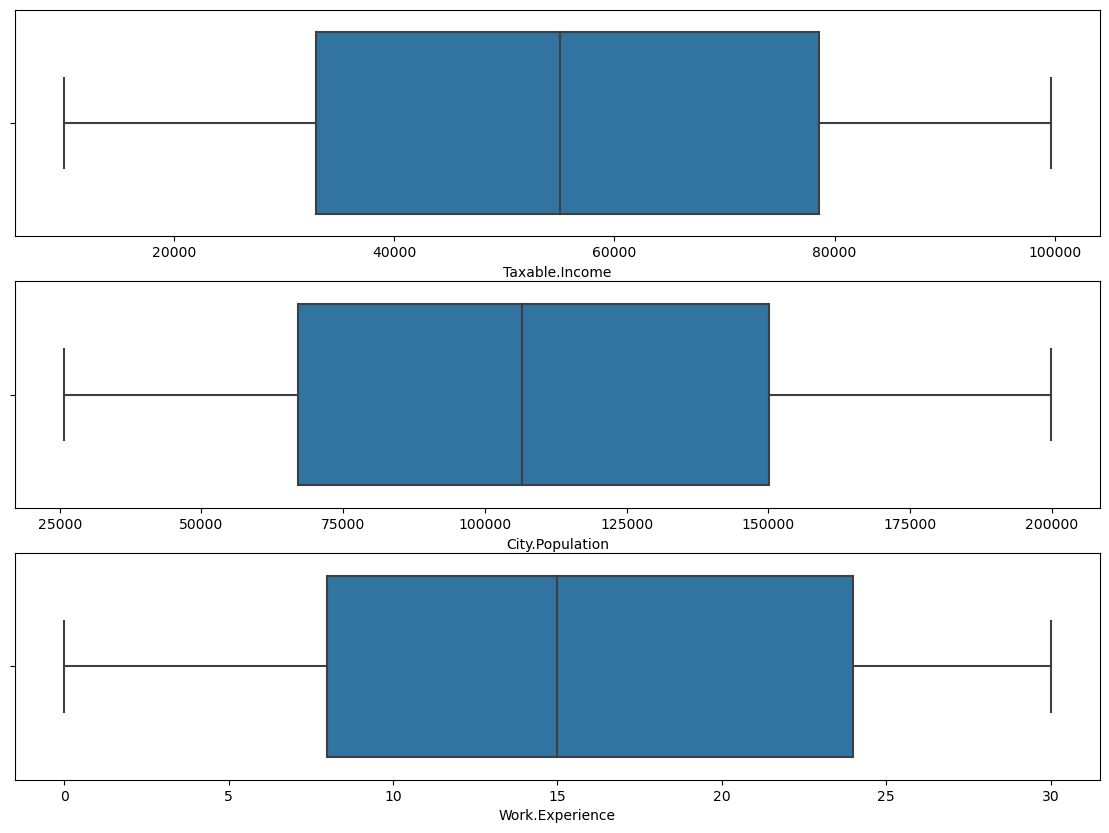

In [87]:
#Plot a Boxplot to look for outliers
fig, axes=plt.subplots(3,1, figsize=(14,10))
sns.boxplot(x='Taxable.Income', data=df, ax=axes[0])
sns.boxplot(x='City.Population', data=df, ax=axes[1])
sns.boxplot(x='Work.Experience', data=df, ax=axes[2])
plt.show()
plt.tight_layout(pad=2.0)

- Outliers are not present in data set.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<Figure size 640x480 with 0 Axes>

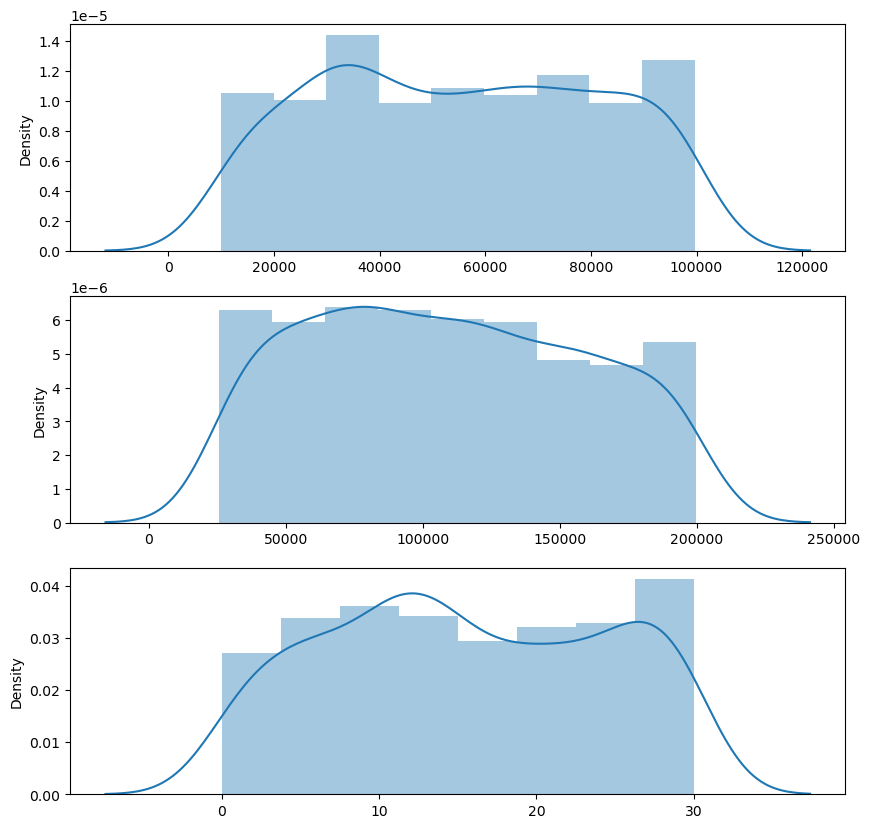

In [88]:
#Plot a histogram to check for distribution
fig, axes=plt.subplots(3,1, figsize=(10,10))
sns.distplot(x=df['Taxable.Income'], ax=axes[0])
sns.distplot(x=df['City.Population'], ax=axes[1])
sns.distplot(x=df['Work.Experience'], ax=axes[2])
plt.show()
plt.tight_layout(pad=2.0)

In [89]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
df[numerical_features].head()

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28


In [90]:
cat_features=[feature for feature in df.columns if df[feature].dtype =='O']
df[cat_features].head()

,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO


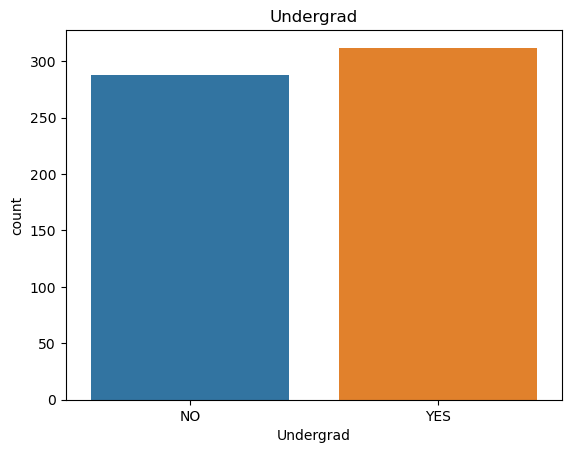

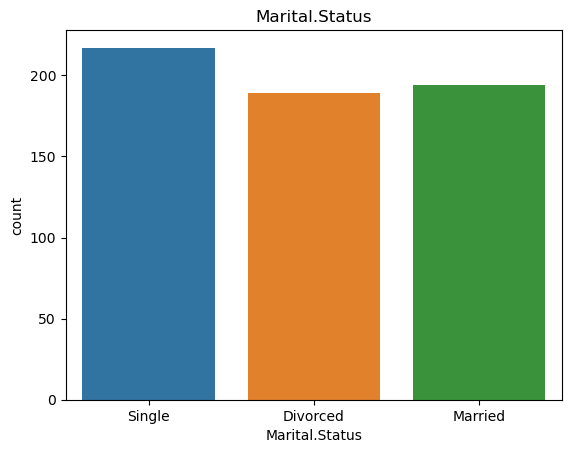

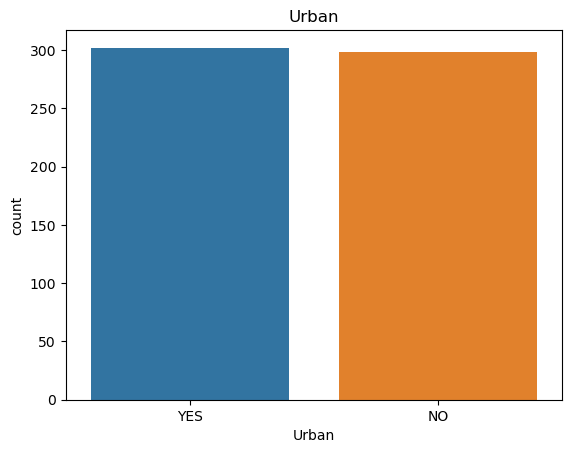

In [91]:
for feature in cat_features:
    data=df.copy()
    sns.countplot(x=data[feature])
    plt.title(feature)
    plt.show()

# Decision Tree

### Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [92]:
df1=df.copy()
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [93]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [94]:
df1['Taxable.Income']

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [95]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


## Feature Engineering

In [96]:
def fn(x):
    df1[x]=df1[x].replace('YES',1)
    df1[x]=df1[x].replace('NO',2)

In [97]:
fn('Undergrad')

In [98]:
df1['Undergrad'].value_counts()

1    312
2    288
Name: Undergrad, dtype: int64

In [99]:
def fn(y):
    df1[y]=df1[y].replace('Single',1)
    df1[y]=df1[y].replace('Married',2)
    df1[y]=df1[y].replace('Divorced',3)

In [100]:
fn('Marital.Status')

In [101]:
df1['Marital.Status'].value_counts()

1    217
2    194
3    189
Name: Marital.Status, dtype: int64

In [102]:
def fn(z):
    df1[z]=df1[z].replace('YES',1)
    df1[z]=df1[z].replace('NO',2)

In [103]:
fn('Urban')

In [104]:
df1['Urban'].value_counts()

1    302
2    298
Name: Urban, dtype: int64

In [105]:
x=df1.drop('Taxable.Income', axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,2,1,50047,10,1
1,1,3,134075,18,1
2,2,2,160205,30,1
3,1,1,193264,15,1
4,2,2,27533,28,2
...,...,...,...,...,...
595,1,3,39492,7,1
596,1,3,55369,2,1
597,2,3,154058,0,1
598,1,2,180083,17,2


In [106]:
y=df1['Taxable.Income']
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20, random_state=1)

In [115]:
from sklearn.tree import DecisionTreeClassifier 

In [118]:
from sklearn.metrics import classification_report

In [119]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74        97
           1       0.15      0.22      0.18        23

    accuracy                           0.61       120
   macro avg       0.47      0.46      0.46       120
weighted avg       0.67      0.61      0.63       120



In [120]:
print('Training accuracy:', dt.score(xtrain,ytrain))
print('Testing accuracy:', dt.score(xtest,ytest))

Training accuracy: 1.0
Testing accuracy: 0.6083333333333333


### Model is overfitted.

## Hyperparameter tuning

In [121]:
params={
    'criterion': ['entropy','gini'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
grid=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,verbose=2)

In [124]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, 

[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END .......criterion=gi

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=2)

In [125]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'splitter': 'best'}

In [126]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=1,splitter='best')
model.fit(xtrain,ytrain)
ypred_=model.predict(xtrain)

In [127]:
print('Training accuracy:' ,model.score(xtrain,ytrain))
print('Testing accuracy:' ,model.score(xtest,ytest))

Training accuracy: 0.7895833333333333
Testing accuracy: 0.8083333333333333


### observation- Now model is generised model

In [128]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 250

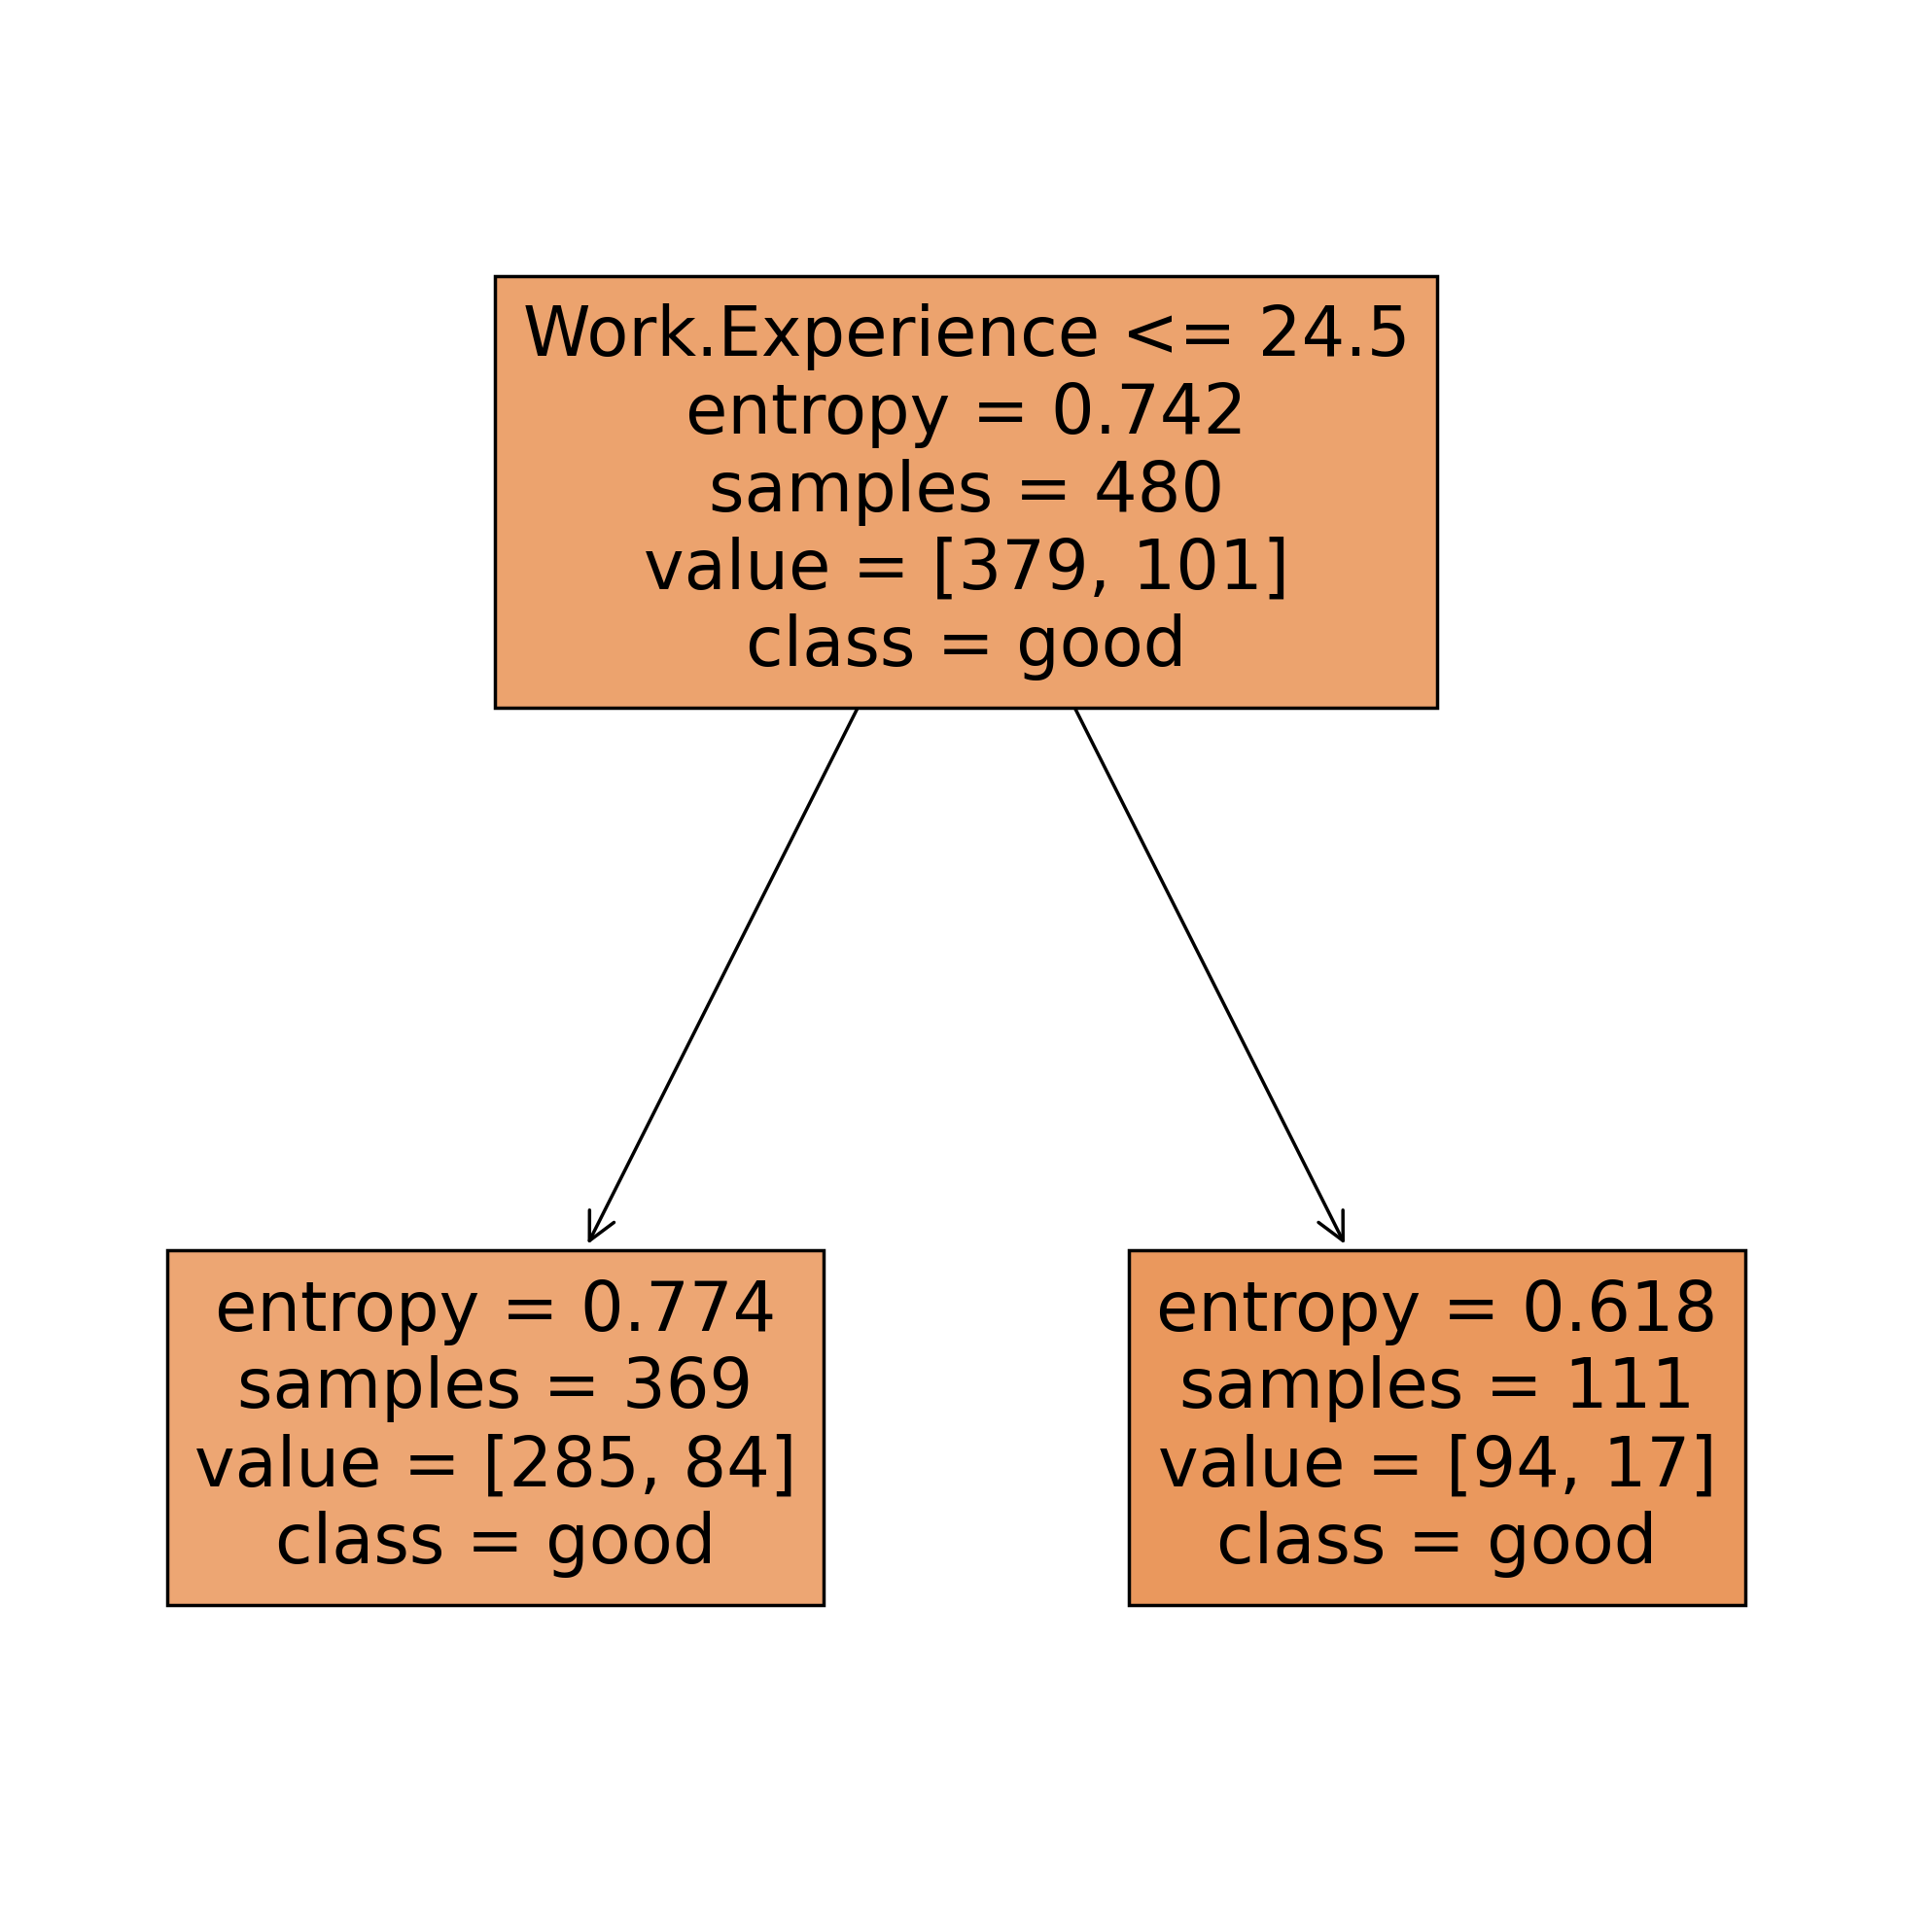

In [132]:
tree.plot_tree(model, feature_names=x.columns, 
               class_names=df1['Taxable.Income'].unique(),
              filled=True)
plt.show()

In [133]:
dt.feature_importances_

array([0.03562653, 0.07804473, 0.62607368, 0.22815643, 0.03209863])

In [134]:
fi = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [135]:
fi

,feature,importance
3,Work.Experience,1.0
0,Undergrad,0.0
1,Marital.Status,0.0
2,City.Population,0.0
4,Urban,0.0
